<a href="https://colab.research.google.com/github/gurujasko11/FAIS-deep-learning/blob/master/Convents/CIFAR10_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))





58892288/58889256 [==============================] - 1s 0us/step








In [0]:
train_images = train_images
train_labels = train_labels

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = train_images[25000:]
train_images = train_images[:25000]

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = train_labels[25000:]
train_labels = train_labels[:25000]
test_labels = to_categorical(test_labels)

In [4]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.0095, decay=1e-6, momentum=0.9, nesterov=True)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='selu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [0]:
conv_base.trainable = False

In [7]:
model_hist = model.fit(train_images, train_labels,
          epochs=25, 
          batch_size=256,
          validation_data=(validation_images, validation_labels))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'




Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 35s 1ms/step - loss: 1.8310 - acc: 0.3444 - val_loss: 1.1930 - val_acc: 0.5729
Epoch 2/25
25000/25000 [==============================] - 26s 1ms/step - loss: 1.0351 - acc: 0.6437 - val_loss: 0.9270 - val_acc: 0.6836
Epoch 3/25
25000/25000 [==============================] - 26s 1ms/step - loss: 0.6661 - acc: 0.7730 - val_loss: 0.6882 - val_acc: 0.7678
Epoch 4/25
25000/25000 [==============================] - 26s 1ms/step - loss: 0.4911 - acc: 0.8353 - val_loss: 0.5926 - val_acc: 0.8021
Epoch 5/25
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3751 - acc: 0.8721 - val_loss: 0.6240 - val_acc: 0.7922
Epoch 6/25
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2926 - acc: 0.9028 - val_loss: 0.5325 - val_acc: 0.8293
Epoch 7/25
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2042 - acc: 0.9324 - val_loss: 0.5913 - val_a

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 7s 653us/step
test_acc: 0.8389
test_loss: 0.8845592962026596


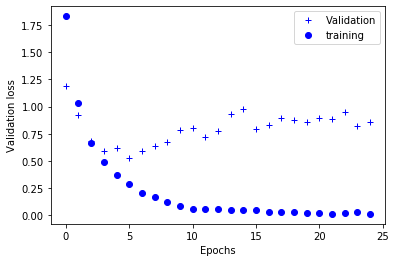

In [9]:
import matplotlib.pyplot as plt

epochs = range(0, 25)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
model.save_weights('./cifar10_pretrained.h5', overwrite=True)